In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import re
# params
SAVEDIR = 'plots/'
FS = 20
N_SAMPLES = 1e5
PULSES = ["RC", "BTRC", "IPLCP", "ELP"]
JITTERS = ["0.05", "0.1", "0.2", "0.25"]
#
%matplotlib inline
#
warnings.simplefilter(action='ignore', category=FutureWarning)

# P1

## Time domain

In [37]:
data_time = pd.read_csv("results/P1_time_results.csv")
data_time.drop(columns=["Unnamed: 8"], inplace=True)
# Get data titles as a list
titles = data_time.columns.tolist()
# Separate by alpha
alpha022 = [title for title in titles if "0.22" in title]
alpha050 = [title for title in titles if "0.50" in title]

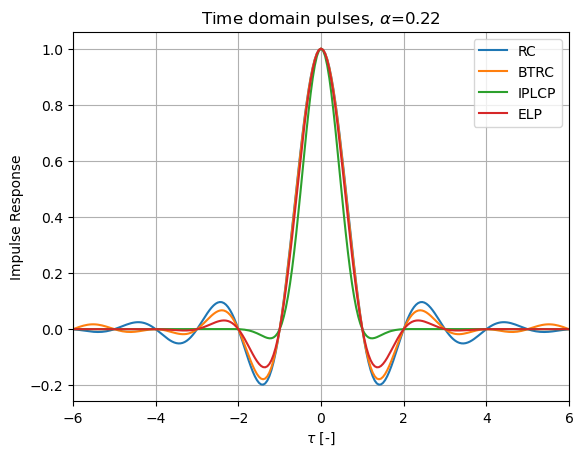

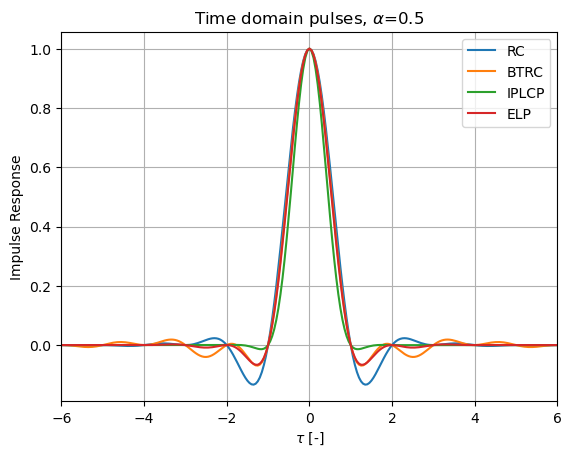

In [38]:
# Create a figure with 2x2 subplots
fig1, axs1 = plt.subplots(1)
fig2, axs2 = plt.subplots(1)
# Add titles
axs1.set_title("Time domain pulses, " + r"$\alpha$=0.22")
axs1.set_xlabel(r"$\tau$ [-]")
axs1.set_ylabel("Impulse Response")
axs1.set_xlim(-6, 6)
axs1.grid()
#
axs2.set_title("Time domain pulses, " + r"$\alpha$=0.5")
axs2.set_xlabel(r"$\tau$ [-]")
axs2.set_ylabel("Impulse Response")
axs2.set_xlim(-6, 6)
axs2.grid()
# Time domain plots
# Create x axis
lenx = len(data_time.index) - 1
data_time["time"] = np.linspace(-lenx/(2 *FS), lenx/(2 *FS), lenx + 1)
for i in range(len(alpha022)):
    # 0.22
    pulse = alpha022[i]
    # Get the pulse name
    pulse_name = re.split("_", pulse)
    axs1.plot(data_time["time"], data_time[pulse], label=pulse_name[0])
    # 0.50
    pulse = alpha050[i]
    pulse_name = re.split("_", pulse)
    axs2.plot(data_time["time"], data_time[pulse], label=pulse_name[0])
# Add legend
axs2.legend()
axs1.legend()
# Save the plots
fig2.savefig(SAVEDIR + "time_domain_050.pdf")
fig1.savefig(SAVEDIR + "time_domain_022.pdf")


## Frequency domain

In [39]:
data_freq = pd.read_csv("results/P1_freq_results.csv")
data_freq.drop(columns=["Unnamed: 8"], inplace=True)
# Get data titles as a list
titles = data_freq.columns.tolist()
# Separate by alpha
alpha022 = [title for title in titles if "0.22" in title]
alpha050 = [title for title in titles if "0.50" in title]

16384


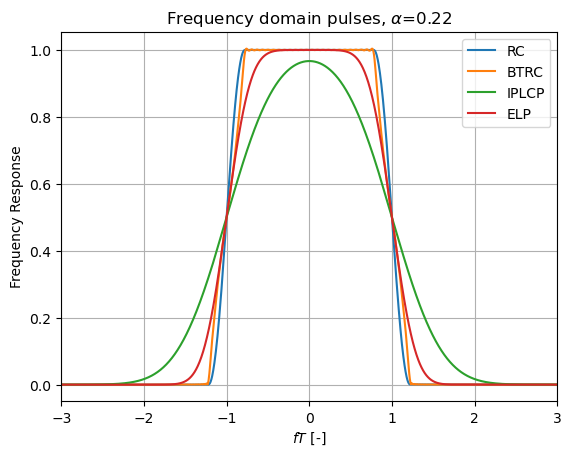

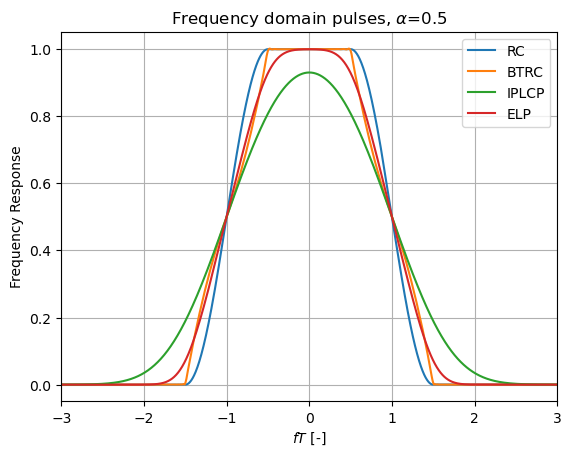

In [40]:
# Create a figure with 2x2 subplots
fig1, axs1 = plt.subplots(1)
fig2, axs2 = plt.subplots(1)
# Add titles
axs1.set_title("Frequency domain pulses, " + r"$\alpha$=0.22")
axs1.set_xlabel(r"$fT$ [-]")
axs1.set_ylabel("Frequency Response")
axs1.set_xlim(-3, 3)
axs1.grid()
#
axs2.set_title("Frequency domain pulses, " + r"$\alpha$=0.5")
axs2.set_xlabel(r"$fT$ [-]")
axs2.set_ylabel("Frequency Response")
axs2.set_xlim(-3, 3)
axs2.grid()
# Freq domain plots
# Create x axis
lenxf = len(data_freq.index)
print(lenxf)
interval = (-lenx/(2 *FS) - lenx/(2 *FS)) / lenx
# Calculate the new min and max based on the new length
new_min = -lenx/(2 *FS) - (interval * (lenx / lenxf))
new_max = lenx/(2 *FS) + (interval * (lenx / lenxf))
# Generate the new array with 1024 values
new_data_freq = np.linspace(new_min, new_max, lenxf)
data_freq["freq"] = new_data_freq/(new_data_freq[-1] * interval)

for i in range(len(alpha022)):
    # 0.22
    pulse = alpha022[i]
    # Get the pulse name
    pulse_name = re.split("_", pulse)
    axs1.plot(data_freq["freq"], data_freq[pulse], label=pulse_name[0])
    # 0.50
    pulse = alpha050[i]
    pulse_name = re.split("_", pulse)
    axs2.plot(data_freq["freq"], data_freq[pulse], label=pulse_name[0])
# Add legend
axs2.legend()
axs1.legend()
# Save the plots
fig2.savefig(SAVEDIR + "freq_domain_050.pdf")
fig1.savefig(SAVEDIR + "freq_domain_022.pdf")

# P2

In [41]:
data_eye = pd.read_csv("results/P2_results.csv")
data_eye.drop(columns=["Unnamed: 4"], inplace=True)
data_eye.tail()
# 

,RC_alpha_0.22,BTRC_alpha_0.22,IPLCP_alpha_0.22,ELP_alpha_0.22
2001195,0.0,0.0,0.0,0.0
2001196,0.0,0.0,0.0,0.0
2001197,0.0,0.0,0.0,0.0
2001198,0.0,0.0,0.0,0.0
2001199,0.0,0.0,0.0,0.0


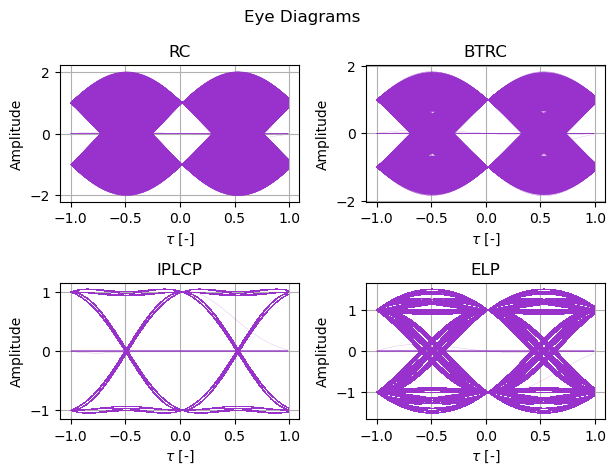

In [42]:
# Get data titles as a list
titles = data_eye.columns.tolist()
fig3, axs3 = plt.subplots(2,2)
# Iterate through the data
for ax in axs3.flat:
    # Get the title
    title = titles.pop(0)
    # Get the data
    data = data_eye[title]
    # Get the name
    pulse_name = re.split("_", title)
    # Plot the data
    # For some reason, the first 600 values are 0 , remove them
    data_e = data[6*FS*FS:].to_numpy()
    x = np.linspace(-1, 0.99, 2*FS)
    data_e_reshape = data_e.reshape((int(len(data_e)/(2*FS)) , 2*FS))
    ax.plot(x, data_e_reshape.T, linewidth=.1, color="darkorchid");
    ax.set_title(pulse_name[0])
    ax.set_xlabel(r"$\tau$ [-]")
    ax.set_ylabel("Amplitude")
    ax.grid()
fig3.suptitle("Eye Diagrams")
fig3.tight_layout()
fig3.savefig(SAVEDIR + "eye_diagram.pdf")
fig3.savefig(SAVEDIR + "eye_diagram.png", dpi = 300)

# P3

In [2]:
distortion = pd.read_csv("results/P3_results.csv")
distortion.drop(columns=["Unnamed: 1"], inplace=True)
distortion = distortion.T
distortion.columns = PULSES

latex = distortion.to_latex(index=False, column_format="cccc", longtable=False, escape=False, caption="Distorsión máxima.", label="tab:distortion")
print(latex)


\begin{table}
\centering
\caption{Distorsión máxima.}
\label{tab:distortion}
\begin{tabular}{cccc}
\toprule
     RC &    BTRC &   IPLCP &     ELP \\
\midrule
2.01064 & 1.85292 & 1.04903 & 1.50949 \\
\bottomrule
\end{tabular}
\end{table}



# P4

In [12]:
ber = pd.read_csv("results/P4_results.csv")
ber.drop(columns=["Unnamed: 24"], inplace=True)
# Add three new colunms, one for alpha, one for snr and one for pulse
alphas = ber.columns.str.split("_").str[2]
snrs = ber.columns.str.split("_").str[4]
pulse_names = ber.columns.str.split("_").str[0]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
ber.insert(0, "alpha", alphas, True)
ber.insert(0, "snr", snrs, True)
ber.insert(2, "pulse", pulse_names, True)
ber.rename(columns=new_names, inplace=True)
# Order the rows by snr and alpha
ber.sort_values(["snr", "alpha", "pulse"], inplace=True)

# Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)


\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{lllrrrr}
\toprule
snr & alpha & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
 10 &  0.22 &  BTRC & 1.045e-03 & 2.118e-03 & 1.182e-02 & 2.557e-02 \\
 10 &  0.22 &   ELP & 9.759e-04 & 1.731e-03 & 8.264e-03 & 1.806e-02 \\
 10 &  0.22 & IPLCP & 8.692e-04 & 1.190e-03 & 3.919e-03 & 8.599e-03 \\
 10 &  0.22 &    RC & 1.092e-03 & 2.407e-03 & 1.462e-02 & 3.120e-02 \\
 10 &  0.35 &  BTRC & 9.706e-04 & 1.702e-03 & 7.996e-03 & 1.745e-02 \\
 10 &  0.35 &   ELP & 9.390e-04 & 1.536e-03 & 6.607e-03 & 1.444e-02 \\
 10 &  0.35 & IPLCP & 8.652e-04 & 1.170e-03 & 3.747e-03 & 8.204e-03 \\
 10 &  0.35 &    RC & 1.030e-03 & 2.034e-03 & 1.103e-02 & 2.393e-02 \\
 10 &  0.50 &  BTRC & 9.095e-04 & 1.389e-03 & 5.441e-03 & 1.190e-02 \\
 10 &  0.50 &   ELP & 8.994e-04 & 1.338e-03 & 5.039e-03 & 1.103e-02 \\
 10 &  0.50 & IPLCP & 8.622e-04 & 1.153e-03 & 3.580e-03 & 7.790e-03 \\
 10 &  0.5

# P5

In [13]:
ber = pd.read_csv("results/P5_results.csv")
ber.drop(columns=["Unnamed: 48"], inplace=True)
# Add four new colunms, one for alpha, one for sir, one for L and one for pulse
alphas = ber.columns.str.split("_").str[2]
snrs = ber.columns.str.split("_").str[4]
ls = ber.columns.str.split("_").str[6]
pulse_names = ber.columns.str.split("_").str[0]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
ber.insert(0, "alpha", alphas, True)
ber.insert(0, "L", ls, True)
ber.insert(0, "sir", snrs, True)
ber.insert(3, "pulse", pulse_names, True)

ber.rename(columns=new_names, inplace=True)
# Order the rows by snr and alpha
ber.sort_values(["sir", "alpha", "L", "pulse"], inplace=True)

# Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{llllrrrr}
\toprule
sir & L & alpha & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
 10 & 2 &  0.22 &  BTRC & 4.719e-03 & 4.932e-03 & 5.863e-03 & 6.655e-03 \\
 10 & 2 &  0.22 &   ELP & 4.725e-03 & 4.955e-03 & 5.971e-03 & 6.840e-03 \\
 10 & 2 &  0.22 & IPLCP & 4.759e-03 & 5.098e-03 & 6.644e-03 & 8.023e-03 \\
 10 & 2 &  0.22 &    RC & 4.717e-03 & 4.924e-03 & 5.827e-03 & 6.593e-03 \\
 10 & 6 &  0.22 &  BTRC & 9.671e-03 & 9.830e-03 & 1.053e-02 & 1.112e-02 \\
 10 & 6 &  0.22 &   ELP & 9.675e-03 & 9.848e-03 & 1.061e-02 & 1.126e-02 \\
 10 & 6 &  0.22 & IPLCP & 9.701e-03 & 9.955e-03 & 1.111e-02 & 1.215e-02 \\
 10 & 6 &  0.22 &    RC & 9.669e-03 & 9.824e-03 & 1.050e-02 & 1.107e-02 \\
 10 & 2 &  0.35 &  BTRC & 4.725e-03 & 4.955e-03 & 5.971e-03 & 6.841e-03 \\
 10 & 2 &  0.35 &   ELP & 4.730e-03 & 4.975e-03 & 6.064e-03 & 7.001e-03 \\
 10 & 2 &  0.35 & IPLCP & 4.765e-03 

# P6

In [14]:
ber = pd.read_csv("results/P6_results.csv")
ber.drop(columns=["Unnamed: 12"], inplace=True)
#
alphas = ber.columns.str.split("_").str[2]
pulse_names = ber.columns.str.split("_").str[0]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
ber.insert(0, "alpha", alphas, True)
ber.insert(1, "pulse", pulse_names, True)
ber.rename(columns=new_names, inplace=True)
# Order the rows by snr and alpha
ber.sort_values(["alpha", "pulse"], inplace=True)

# Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{llrrrr}
\toprule
alpha & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
 0.22 &  BTRC & 1.808e-03 & 3.276e-03 & 1.366e-02 & 2.654e-02 \\
 0.22 &   ELP & 1.690e-03 & 2.689e-03 & 9.543e-03 & 1.843e-02 \\
 0.22 & IPLCP & 1.488e-03 & 1.764e-03 & 3.789e-03 & 6.864e-03 \\
 0.22 &    RC & 1.888e-03 & 3.695e-03 & 1.674e-02 & 3.236e-02 \\
 0.35 &  BTRC & 1.681e-03 & 2.646e-03 & 9.242e-03 & 1.780e-02 \\
 0.35 &   ELP & 1.625e-03 & 2.381e-03 & 7.523e-03 & 1.436e-02 \\
 0.35 & IPLCP & 1.477e-03 & 1.714e-03 & 3.475e-03 & 6.203e-03 \\
 0.35 &    RC & 1.784e-03 & 3.152e-03 & 1.277e-02 & 2.481e-02 \\
 0.50 &  BTRC & 1.572e-03 & 2.141e-03 & 6.052e-03 & 1.142e-02 \\
 0.50 &   ELP & 1.553e-03 & 2.053e-03 & 5.511e-03 & 1.033e-02 \\
 0.50 & IPLCP & 1.465e-03 & 1.657e-03 & 3.085e-03 & 5.349e-03 \\
 0.50 &    RC & 1.685e-03 & 2.662e-03 & 9.344e-03 & 1.801e-02 \\
\bottomrule
\end{t

# P7

## P7.a

In [15]:
ber = pd.read_csv("results/P7a_results_truncation_5.csv")
ber.drop(columns=["Unnamed: 12"], inplace=True)
# ber
alphas = ber.columns.str.split("_").str[2]
pulse_names = ber.columns.str.split("_").str[0]
# snr = ber.columns.str.split("_").str[4]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
# ber.insert(0, "snr", snr, True)
ber.insert(0, "alpha", alphas, True)
ber.insert(1, "pulse", pulse_names, True)
ber.rename(columns=new_names, inplace=True)
# # Order the rows by snr and alpha
ber.sort_values(["alpha", "pulse"], inplace=True)
# # Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{llrrrr}
\toprule
alpha & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
 0.22 &  BTRC & 1.043e-03 & 2.106e-03 & 1.170e-02 & 2.533e-02 \\
 0.22 &   ELP & 9.759e-04 & 1.731e-03 & 8.264e-03 & 1.806e-02 \\
 0.22 & IPLCP & 8.692e-04 & 1.190e-03 & 3.919e-03 & 8.599e-03 \\
 0.22 &    RC & 1.092e-03 & 2.405e-03 & 1.460e-02 & 3.116e-02 \\
 0.35 &  BTRC & 9.702e-04 & 1.699e-03 & 7.975e-03 & 1.741e-02 \\
 0.35 &   ELP & 9.390e-04 & 1.536e-03 & 6.607e-03 & 1.444e-02 \\
 0.35 & IPLCP & 8.652e-04 & 1.170e-03 & 3.747e-03 & 8.204e-03 \\
 0.35 &    RC & 1.030e-03 & 2.034e-03 & 1.102e-02 & 2.392e-02 \\
 0.50 &  BTRC & 9.092e-04 & 1.387e-03 & 5.429e-03 & 1.188e-02 \\
 0.50 &   ELP & 8.994e-04 & 1.338e-03 & 5.039e-03 & 1.103e-02 \\
 0.50 & IPLCP & 8.622e-04 & 1.153e-03 & 3.580e-03 & 7.790e-03 \\
 0.50 &    RC & 9.726e-04 & 1.712e-03 & 8.081e-03 & 1.764e-02 \\
\bottomrule
\end{t

In [16]:
ber = pd.read_csv("results/P7a_results_truncation_10.csv")
ber.drop(columns=["Unnamed: 12"], inplace=True)
# ber
alphas = ber.columns.str.split("_").str[2]
pulse_names = ber.columns.str.split("_").str[0]
# snr = ber.columns.str.split("_").str[4]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
# ber.insert(0, "snr", snr, True)
ber.insert(0, "alpha", alphas, True)
ber.insert(1, "pulse", pulse_names, True)
ber.rename(columns=new_names, inplace=True)
# # Order the rows by snr and alpha
ber.sort_values(["alpha", "pulse"], inplace=True)
# # Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{llrrrr}
\toprule
alpha & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
 0.22 &  BTRC & 1.044e-03 & 2.117e-03 & 1.181e-02 & 2.555e-02 \\
 0.22 &   ELP & 9.759e-04 & 1.731e-03 & 8.264e-03 & 1.806e-02 \\
 0.22 & IPLCP & 8.692e-04 & 1.190e-03 & 3.919e-03 & 8.599e-03 \\
 0.22 &    RC & 1.092e-03 & 2.407e-03 & 1.462e-02 & 3.120e-02 \\
 0.35 &  BTRC & 9.705e-04 & 1.701e-03 & 7.992e-03 & 1.744e-02 \\
 0.35 &   ELP & 9.390e-04 & 1.536e-03 & 6.607e-03 & 1.444e-02 \\
 0.35 & IPLCP & 8.652e-04 & 1.170e-03 & 3.747e-03 & 8.204e-03 \\
 0.35 &    RC & 1.030e-03 & 2.034e-03 & 1.103e-02 & 2.393e-02 \\
 0.50 &  BTRC & 9.094e-04 & 1.389e-03 & 5.440e-03 & 1.190e-02 \\
 0.50 &   ELP & 8.994e-04 & 1.338e-03 & 5.039e-03 & 1.103e-02 \\
 0.50 & IPLCP & 8.622e-04 & 1.153e-03 & 3.580e-03 & 7.790e-03 \\
 0.50 &    RC & 9.726e-04 & 1.712e-03 & 8.081e-03 & 1.764e-02 \\
\bottomrule
\end{t

## P7.b

In [17]:
ber = pd.read_csv("results/P7b_results_truncation_5.csv")
ber.drop(columns=["Unnamed: 24"], inplace=True)
ber
# ber
alphas = ber.columns.str.split("_").str[2]
pulse_names = ber.columns.str.split("_").str[0]
Ls = ber.columns.str.split("_").str[6]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
ber.insert(0, "alpha", alphas, True)
ber.insert(0, "L", Ls, True)
ber.insert(2, "pulse", pulse_names, True)
ber.rename(columns=new_names, inplace=True)
# Order the rows by snr and alpha
ber.sort_values(["L", "alpha", "pulse"], inplace=True)
# # # Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{lllrrrr}
\toprule
L & alpha & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
2 &  0.22 &  BTRC & 4.719e-03 & 4.932e-03 & 5.863e-03 & 6.655e-03 \\
2 &  0.22 &   ELP & 4.725e-03 & 4.955e-03 & 5.971e-03 & 6.840e-03 \\
2 &  0.22 & IPLCP & 4.759e-03 & 5.098e-03 & 6.644e-03 & 8.023e-03 \\
2 &  0.22 &    RC & 4.717e-03 & 4.924e-03 & 5.827e-03 & 6.593e-03 \\
2 &  0.35 &  BTRC & 4.725e-03 & 4.955e-03 & 5.971e-03 & 6.841e-03 \\
2 &  0.35 &   ELP & 4.730e-03 & 4.975e-03 & 6.064e-03 & 7.001e-03 \\
2 &  0.35 & IPLCP & 4.765e-03 & 5.125e-03 & 6.775e-03 & 8.259e-03 \\
2 &  0.35 &    RC & 4.720e-03 & 4.935e-03 & 5.879e-03 & 6.682e-03 \\
2 &  0.50 &  BTRC & 4.735e-03 & 4.996e-03 & 6.162e-03 & 7.173e-03 \\
2 &  0.50 &   ELP & 4.738e-03 & 5.010e-03 & 6.227e-03 & 7.286e-03 \\
2 &  0.50 & IPLCP & 4.776e-03 & 5.171e-03 & 7.006e-03 & 8.681e-03 \\
2 &  0.50 &    RC & 4.725e-03 & 4.

In [18]:
ber = pd.read_csv("results/P7b_results_truncation_10.csv")
ber.drop(columns=["Unnamed: 24"], inplace=True)
ber
# ber
alphas = ber.columns.str.split("_").str[2]
pulse_names = ber.columns.str.split("_").str[0]
Ls = ber.columns.str.split("_").str[6]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
ber.insert(0, "alpha", alphas, True)
ber.insert(0, "L", Ls, True)
ber.insert(2, "pulse", pulse_names, True)
ber.rename(columns=new_names, inplace=True)
# Order the rows by snr and alpha
ber.sort_values(["L", "alpha", "pulse"], inplace=True)
# # # Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{lllrrrr}
\toprule
L & alpha & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
2 &  0.22 &  BTRC & 4.719e-03 & 4.932e-03 & 5.863e-03 & 6.655e-03 \\
2 &  0.22 &   ELP & 4.725e-03 & 4.955e-03 & 5.971e-03 & 6.840e-03 \\
2 &  0.22 & IPLCP & 4.759e-03 & 5.098e-03 & 6.644e-03 & 8.023e-03 \\
2 &  0.22 &    RC & 4.717e-03 & 4.924e-03 & 5.827e-03 & 6.593e-03 \\
2 &  0.35 &  BTRC & 4.725e-03 & 4.955e-03 & 5.971e-03 & 6.841e-03 \\
2 &  0.35 &   ELP & 4.730e-03 & 4.975e-03 & 6.064e-03 & 7.001e-03 \\
2 &  0.35 & IPLCP & 4.765e-03 & 5.125e-03 & 6.775e-03 & 8.259e-03 \\
2 &  0.35 &    RC & 4.720e-03 & 4.935e-03 & 5.879e-03 & 6.682e-03 \\
2 &  0.50 &  BTRC & 4.735e-03 & 4.996e-03 & 6.162e-03 & 7.173e-03 \\
2 &  0.50 &   ELP & 4.738e-03 & 5.010e-03 & 6.227e-03 & 7.286e-03 \\
2 &  0.50 & IPLCP & 4.776e-03 & 5.171e-03 & 7.006e-03 & 8.681e-03 \\
2 &  0.50 &    RC & 4.725e-03 & 4.

## P7.c

In [19]:
ber = pd.read_csv("results/P7c_results_truncation_5.csv")
ber.drop(columns=["Unnamed: 4"], inplace=True)
# ber
# alphas = ber.columns.str.split("_").str[2]
pulse_names = ber.columns.str.split("_").str[0]
# Ls = ber.columns.str.split("_").str[6]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber = ber.T
# ber.insert(0, "alpha", alphas, True)
# ber.insert(0, "L", Ls, True)
ber.insert(0, "pulse", pulse_names, True)
ber.insert(0, "truncation", ["5.0","5.0","5.0","5.0"], True)
ber.rename(columns=new_names, inplace=True)
# # Order the rows by snr and alpha
ber.sort_values(["pulse"], inplace=True)
# # # # Show as latex
latex = ber.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{llrrrr}
\toprule
truncation & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
       5.0 &  BTRC & 1.805e-03 & 3.260e-03 & 1.354e-02 & 2.630e-02 \\
       5.0 &   ELP & 1.690e-03 & 2.689e-03 & 9.543e-03 & 1.843e-02 \\
       5.0 & IPLCP & 1.488e-03 & 1.764e-03 & 3.789e-03 & 6.864e-03 \\
       5.0 &    RC & 1.887e-03 & 3.692e-03 & 1.671e-02 & 3.232e-02 \\
\bottomrule
\end{tabular}
\end{table}



In [20]:
ber1 = pd.read_csv("results/P7c_results_truncation_10.csv")
ber1.drop(columns=["Unnamed: 4"], inplace=True)
# ber
# alphas = ber.columns.str.split("_").str[2]
pulse_names = ber1.columns.str.split("_").str[0]
# Ls = ber.columns.str.split("_").str[6]
new_names = dict(zip([0, 1, 2, 3], JITTERS))
ber1 = ber1.T
# ber.insert(0, "alpha", alphas, True)
# ber.insert(0, "L", Ls, True)
ber1.insert(0, "pulse", pulse_names, True)
ber1.insert(0, "truncation", ["10.0","10.0","10.0","10.0"], True)
ber1.rename(columns=new_names, inplace=True)
# # Order the rows by snr and alpha
ber1.sort_values(["pulse"], inplace=True)
# # # # Show as latex
latex = ber1.to_latex(index=False, longtable=False, escape=False, caption="BER para diferentes valores de SNR y alpha.", label="tab:ber", float_format="%.3e")
print(latex)

\begin{table}
\centering
\caption{BER para diferentes valores de SNR y alpha.}
\label{tab:ber}
\begin{tabular}{llrrrr}
\toprule
truncation & pulse &      0.05 &       0.1 &       0.2 &      0.25 \\
\midrule
      10.0 &  BTRC & 1.808e-03 & 3.275e-03 & 1.365e-02 & 2.652e-02 \\
      10.0 &   ELP & 1.690e-03 & 2.689e-03 & 9.543e-03 & 1.843e-02 \\
      10.0 & IPLCP & 1.488e-03 & 1.764e-03 & 3.789e-03 & 6.864e-03 \\
      10.0 &    RC & 1.888e-03 & 3.695e-03 & 1.674e-02 & 3.236e-02 \\
\bottomrule
\end{tabular}
\end{table}

